## Multiple Linear Regression
It is a statistical method used to analyze the relationship between multiple independent variables and a single dependent variable. It is an extension of simple linear regression which only consists of one independent variable.

The relationship between the dependent variable and independent variables is modeled as a linear equation. The goal is to find the coefficients that best fit the data and allow us to predict the dependent variable based on the values of the independent variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
housing_data = pd.read_csv('Bangalore.csv')
housing_data.head() 

,Price,Area,Location,NumBedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [3]:
varlist = ['Price','Area','NumBedrooms','Resale','MaintenanceStaff','Gymnasium','SwimmingPool','LandscapedGardens','IndoorGames']
data = housing_data[varlist].copy()

In [4]:
# checking for null values
print(data.info())

# checking for outliers
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Price              6207 non-null   int64
 1   Area               6207 non-null   int64
 2   NumBedrooms        6207 non-null   int64
 3   Resale             6207 non-null   int64
 4   MaintenanceStaff   6207 non-null   int64
 5   Gymnasium          6207 non-null   int64
 6   SwimmingPool       6207 non-null   int64
 7   LandscapedGardens  6207 non-null   int64
 8   IndoorGames        6207 non-null   int64
dtypes: int64(9)
memory usage: 436.5 KB
None
              Price         Area  NumBedrooms       Resale  MaintenanceStaff  \
count  6.207000e+03  6207.000000  6207.000000  6207.000000       6207.000000   
mean   1.058510e+07  1526.094248     2.556952     0.078782          6.208797   
std    1.410943e+07   764.845609     0.694300     0.269420          4.126883   
min    2.000000e+06   4

Text(0, 0.5, 'Price')

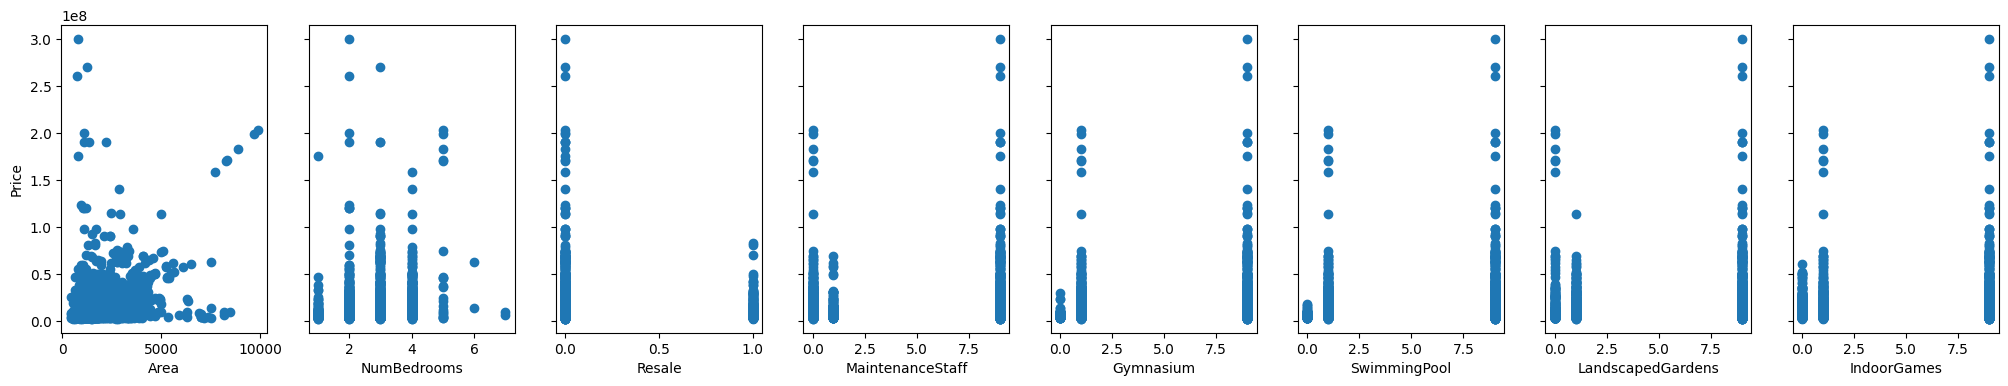

In [5]:
# some of the features like Gymnaisum should have bool values and the mean should not be more than 1
# plotting the to check if scaling is required
fig,ax = plt.subplots(1,8, figsize=(25,4), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(data[varlist[i+1]],data[varlist[0]])
    ax[i].set_xlabel(varlist[i+1])
ax[0].set_ylabel('Price')

In [6]:
# MainenanceStaff, Gymnasium, SwimmingPool, LandscapedGardens and IndoorGames needs to be manipulated
MaintenanceStaff = [1 if i>1 else 0 for i in data.MaintenanceStaff]
Gymnasium = [1 if i>1 else 0 for i in data.Gymnasium]
SwimmingPool = [1 if i>1 else 0 for i in data.SwimmingPool]
LandscapedGardens = [1 if i>1 else 0 for i in data.LandscapedGardens]
IndoorGames = [1 if i>1 else 0 for i in data.IndoorGames]

In [7]:
# all the features are scaled except Area and NumBedrooms
# performing z-score normalization on Area
std_dev = np.std(data.Area)
mean = np.mean(data.Area)
Area = [(i-mean)/std_dev for i in data.Area]

# performing z-score normalization on NumBedrooms
std_dev = np.std(data.NumBedrooms)
mean = np.mean(data.NumBedrooms)
NumBedrooms = [(i-mean)/std_dev for i in data.NumBedrooms]

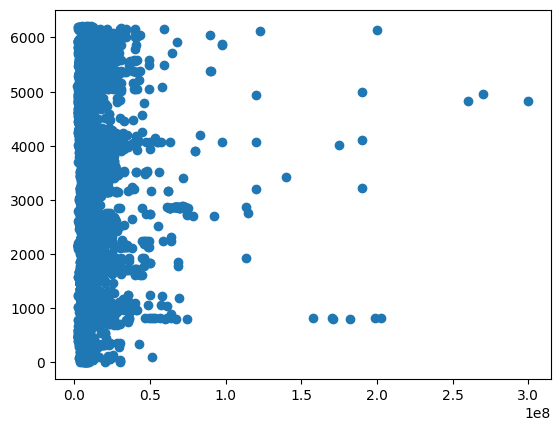

In [8]:
# plotting Price to check if scaling is required
plt.scatter(data.Price,list(range(len(data.Price))))

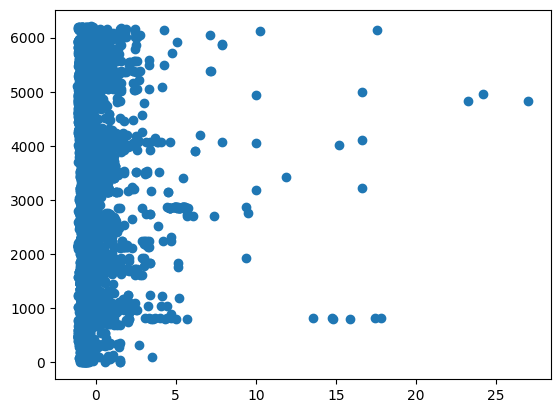

In [9]:
# some values are too large
# performing z-score normalization on price
std_dev = np.std(data.Price)
mean = np.mean(data.Price)
Price = [(i-std_dev)/mean for i in data.Price]
plt.scatter(Price,list(range(len(Price))))

Text(0, 0.5, 'Price')

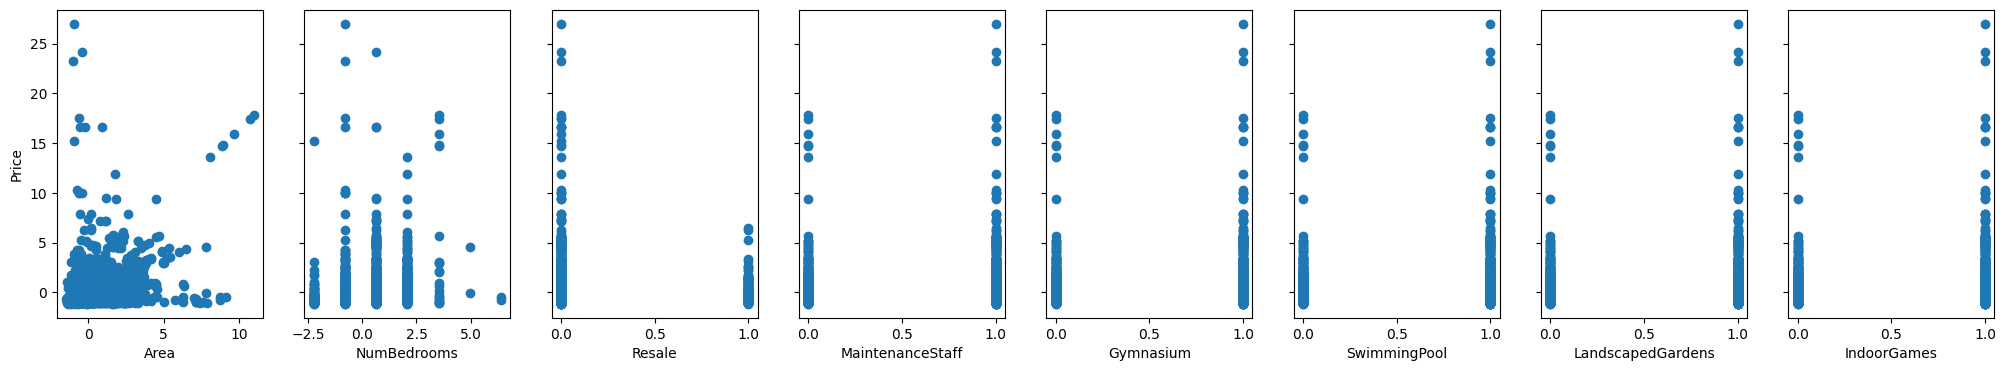

In [10]:
# combining scaled data into a single dataframe
scaled_data = pd.DataFrame()
for var in varlist:
    if var == 'Resale':
        scaled_data[var] = data.Resale
    else:
        scaled_data[var] = eval(var)

fig,ax = plt.subplots(1,8, figsize=(25,4), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(scaled_data[varlist[i+1]],scaled_data[varlist[0]])
    ax[i].set_xlabel(varlist[i+1])
ax[0].set_ylabel('Price')

In [11]:
# splitting the data into training and testing data
scaled_data = scaled_data.sample(frac=1, random_state=42).reset_index(drop=True)
train_to_test_ratio = 0.7
size = int(train_to_test_ratio * len(scaled_data))

data_train = scaled_data[size:]
data_test = scaled_data[:size]

x_train = data_train[varlist[1:]].values
y_train = data_train[varlist[0]].values

x_test = data_test[varlist[1:]].values
y_test = data_test[varlist[0]].values
           

### Prediction function
We need to derive a function $f(\vec{w},b)$ where $f(\vec{w},b) = \vec{w}*\vec{x} + b$   
here, $\vec{w}$ is an array of weights = $[w_1,w_2,w_3 .....w_n]$  
and $b$ is the bias  
This function predicts the value of y (price) for a given $\vec{x}$ where $\vec{x}$ is the array of features = $[x_1,x_2,x_3 ... x_n]$  

In [12]:
#%% derived function
def predicted_y(x,w,b):
    '''
    
    Parameters
    ----------
    x : numpy.ndarray
        DESCRIPTION - array of features (x1...xn)
    w : numpy.ndarray
        DESCRIPTION - array of weights (w1...wn)
    b : float
        DESCRIPTION - bias
    Returns
    -------
    y : float
        DESCRIPTION - predicted y based on x

    '''
    f = np.dot(w,x) + b
    return f

### Cost function
In order to judge our prediction error, a cost function is used,  
$$J(\vec{w},b) = \frac{1}{2m}\sum_{i=0}^{m-1}  (f_{\vec{w},b}(\vec{x}^i) - y^i)^2$$  
This cost function calculates the prediction error - error between the predicted value and the training value.  

In [13]:
# cost function
def compute_cost(x_train,y_train,w,b):
    '''
    Parameters
    ----------
    x_train : numpy.ndarray
        DESCRIPTION - training data features
    y_train : numpy.ndarray
        DESCRIPTION : training data targets
    w : numpy.ndarray
        DESCRIPTION - array of weights (w1...wn)
    b : float
        DESCRIPTION - bias
    Returns
    -------
    y : float
        DESCRIPTION - predicted y based on x

    '''
    SUM = 0
    m = x_train.shape[0]
    for i in range(m):
        x = x_train[i]
        y = y_train[i]
        
        f = predicted_y(x,w,b)
        
        SUM += (f-y)**2
    cost = SUM/(2*m)
    return cost

### Compute gradient  
Gradient is a partial derivative of the cost function $J(w,b)$ w.r.t. parameters $w$ and $b$
$$\frac{\partial (J(\vec{w},b)}{\partial (\vec{w})} = \frac{1}{m}\sum_{i=0}^{m-1}(f_{\vec{w},b}(\vec{x}^i) - y^i)\vec{x}^i$$   
$$\frac{\partial (J(\vec{w},b)}{\partial (b)} = \frac{1}{m}\sum_{i=0}^{m-1}(f_{\vec{w},b}(\vec{x}^i) - y^i)$$

In [14]:
# compute gradient
def compute_gradient(x_train,y_train,w,b):
    '''
    Parameters
    ----------
    x_train : numpy.ndarray
        DESCRIPTION - training data features
    y_train : numpy.ndarray
        DESCRIPTION : training data targets
    w : numpy.ndarray
        DESCRIPTION - array of weights (w1...wn)
    b : float
        DESCRIPTION - bias
        
    Returns
    -------
    dj_dw : numpy.ndarray
        DESCRIPTION - array of gradient values for all parameters
    dj_db : numpy.float64
        DESCRIPTION - bias gradient
    '''
    SUMw = 0
    SUMb = 0
    
    m = x_train.shape[0]
    SUMw = np.zeros(8)
    SWMb = 0
    for i in range(m):
        x = x_train[i]
        y = y_train[i]

        f = predicted_y(x,w,b)
        
        SUMw += np.array([np.dot((f-y),i) for i in x])
        SUMb += f-y

    dj_dw = SUMw/m
    dj_db = SUMb/m
    
    return dj_dw, dj_db

### Gradient descent
For every iteration the gradient is calculated, the values of $w$ and $b$ needs to be simultaneously updated.

$$\vec{w} = \vec{w} - \alpha \frac{\partial (J(\vec{w},b)}{\partial (\vec{w})}$$
$$b = b - \alpha \frac{\partial (J(\vec{w},b)}{\partial (b)}$$
here, $\alpha$ is the learning rate  
This step needs to be repetaed until the values of $\vec{w}$ and $b$ converge.

In [15]:
#gradient descent
def gradient_descent(x_train,y_train,num_iters,alpha,w,b):
    '''
    Parameters
    ----------
    x_train : numpy.ndarray
        DESCRIPTION - training data features
    y_train : numpy.ndarray
        DESCRIPTION : training data targets
    num_iters : int
        DESCRIPTION : number of iterations
    alpha : float
        DESCRIPTION - learning rate
    w : numpy.ndarray
        DESCRIPTION - array of weights (w1...wn)
    b : float
        DESCRIPTION - bias    
    
    
    '''
    J_history = []
    w_history = []
    b_history = []
    
    m = x_train.shape[0]
    
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x_train,y_train,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        cost = compute_cost(x_train, y_train,w,b)
        J_history.append(cost)
        w_history.append(w)
        b_history.append(b)
        
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ")
                 # f"dj_dw: {dj_dw}, dj_db: {dj_db: 0.3e}  ",
                 # f"w: {w}, b:{b: 0.5e}")
        # break the loop if the cost has converged i.e. the diference in cost is less than 1e-7
        if i>1 and abs((J_history[-1]) - (J_history[-2])) <= 1e-7:    
            print('\ncost has converged')
            print(f'cost at convergence : {cost}')
            break
    print('w = {}\nb = {}'.format(w,b))
    return J_history, w_history, b_history #return w and J,w history for graphing
        

In [16]:
# performing multiple linear regression
import time
tic = time.time()
w = np.random.normal(size=8)
b = 0
num_iters = 10000
alpha = 1e-2

# perform gradient descent
J_history, w_history, b_history = gradient_descent(x_train, y_train, num_iters, alpha, w, b)
toc = time.time()
time = (toc-tic)/60
print(f'computation time : {time} minutes')

Iteration    0: Cost 2.81e+00 
Iteration 1000: Cost 5.35e-01 
Iteration 2000: Cost 5.34e-01 
Iteration 3000: Cost 5.33e-01 

cost has converged
cost at convergence : 0.5334277169272521
w = [ 0.54610662 -0.1116658  -0.34595875  0.84438376 -1.16115836 -0.78686157
  2.00793747 -0.86393735]
b = -0.36799616624792464
computation time : 2.6091659982999165 minutes


<IPython.core.display.Javascript object>


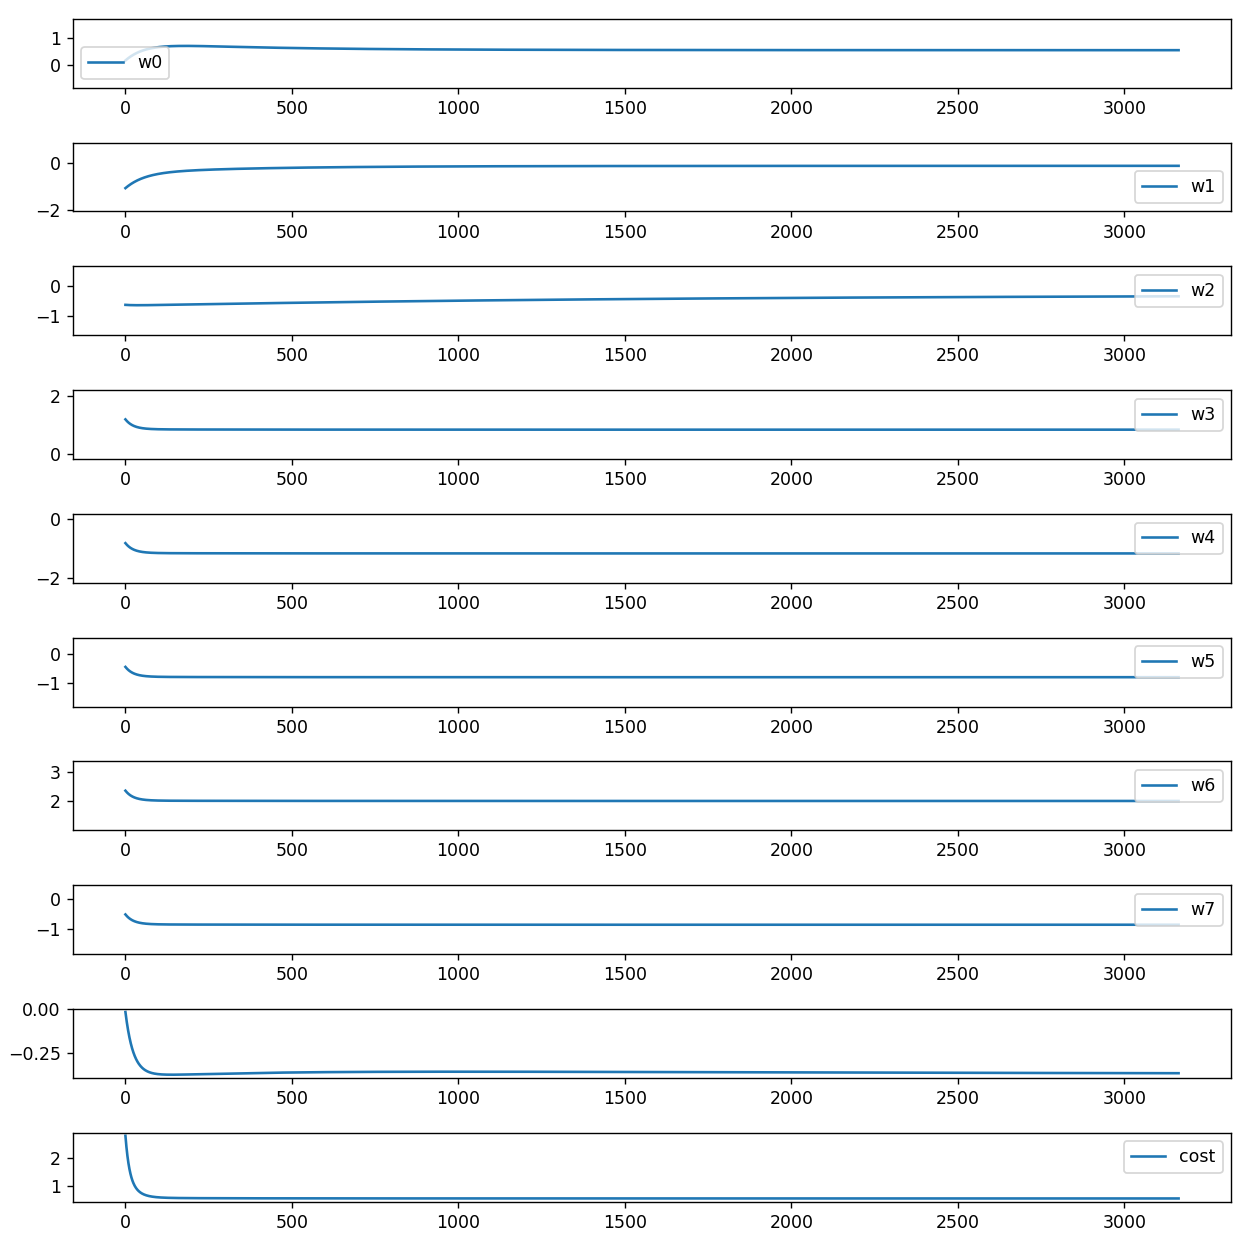

In [20]:
#plotting the parameters and cost to check the convergence
%matplotlib notebook
fig,ax = plt.subplots(10,1, figsize=(10,10))
for i in range(8):
    ax[i].plot(np.array(w_history)[:,i], label=(f'w{i}'))
    ax[i].legend()
    ax[i].set_ylim((min(np.array(w_history)[:,i])-1),max(np.array(w_history)[:,i])+1)
ax[8].plot(b_history, label='b')
ax[9].plot(J_history, label='cost')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
#the parameters and the cost is visibly converged

#predicting the price using the testing data
m = x_test.shape[0]
y_pred = []

for i in range(m):
    x = x_test[i]
    y = y_test[i]
    y_pred.append(predicted_y(x,w,b))
    
    

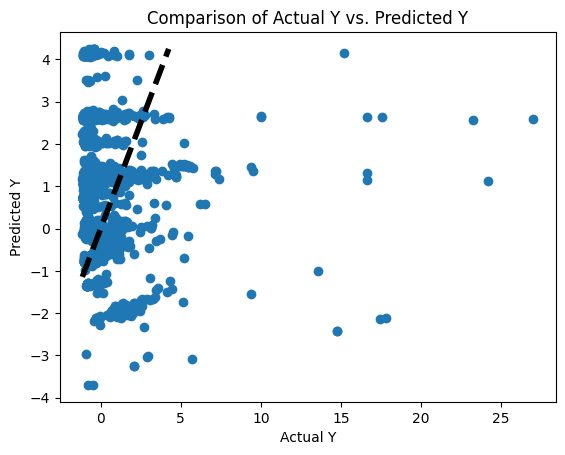

In [19]:
# plotting the testing and predicted data to check the model
%matplotlib inline
plt.scatter(y_test, y_pred)

# Add a diagonal line to the plot
plt.plot([min(y_test), max(y_pred)], [min(y_test), max(y_pred)], 'k--', lw=4)

# Add labels and title
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Comparison of Actual Y vs. Predicted Y')

# Show the plot
plt.show()

## Summary
The this dataset, using multiple linear regression has definitely improved the prediction instead of just single variable linear regression. The reason behind this improved accuracy is that the use of more than one feature for prediction.

Univariate single linear regression:
https://github.com/UmangTyagi/machine_learning_specialization/blob/master/linear_regression/univariate_linear_regression.ipynb